In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import healpy as hp
from astropy import coordinates
from astropy import units as u
from scipy.ndimage.filters import gaussian_filter

In [3]:
d2r = np.pi / 180.

In [4]:
bank = 'A'
session = '5'
dataf = np.load('/home/mabitbol/GBT-S140/datamaps/tod'+bank+'_'+session+'.npz')
tmask = dataf['tmask']
ras = dataf['ras'][tmask]
decs = dataf['decs'][tmask]
calibrated = dataf['calibrated'][tmask]

tmask2 = ~np.isnan(calibrated)
ras = ras[tmask2]
decs = decs[tmask2]
calibrated = calibrated[tmask2] 

In [5]:
c = coordinates.SkyCoord(frame='icrs', ra=ras*u.degree, dec=decs*u.degree)
lats = c.galactic.b.deg
lons = c.galactic.l.deg

In [6]:
dustmap = hp.read_map('/home/mabitbol/GBT-S140/externaldata/COM_CompMap_Dust-GNILC-Model-Opacity_2048_R2.00.fits')

NSIDE = 2048
ORDERING = RING in fits file


In [7]:
haslam = hp.read_map('/home/mabitbol/GBT-S140/externaldata/lambda_haslam408_nofilt.fits')

NSIDE = 512
ORDERING = NESTED in fits file
Ordering converted to RING


In [8]:
lonc = 107.2
latc = 5.2
lonra = [lons.min(), lons.max()]
latra = [lats.min(), lats.max()]
lonra2 = [lonc-4, lonc+4]
latra2 = [latc-4, latc+4]

In [9]:
#x (row, column).  row goes from down to up.  column goes from left to right. 

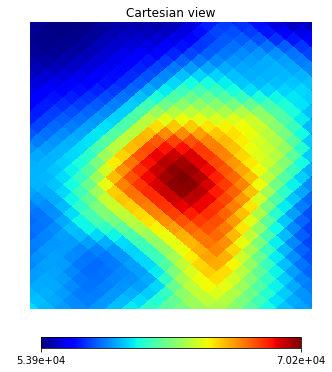

In [10]:
x = hp.cartview(haslam, lonra=lonra, latra=latra, return_projected_map=True, flip='geo')
fig = gcf()

In [11]:
ax = fig.axes[0]
print ax.get_xlim()
print ax.get_ylim()
img = ax.images[0]
print img.get_extent()

(105.74534025062628, 108.64824459896158)
(3.7224089900461834, 6.6793296655618217)
(105.74534025062628, 108.64824459896158, 3.7224089900461834, 6.6793296655618217)


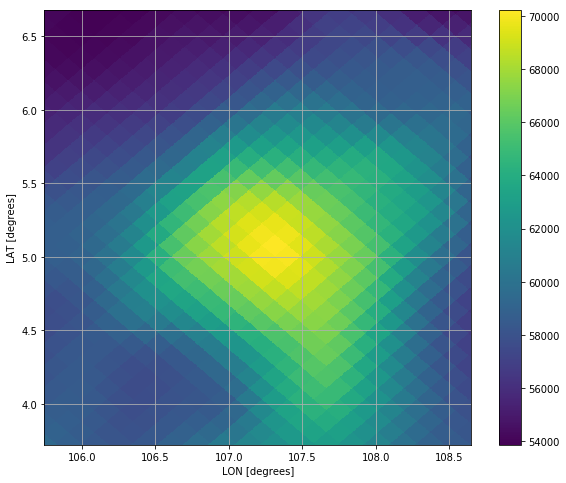

In [12]:
figsize(10, 8)
imshow(x, extent=img.get_extent(), origin='lower')
cm = colorbar()
#clim(0.00005, 0.0003)
grid()
xlabel('LON [degrees]')
ylabel('LAT [degrees]')
#title('Planck Dust Opacity Map')
#cm.set_label('Units??')

In [13]:
x.shape

(815, 800)

In [14]:
X = np.linspace(img.get_extent()[0], img.get_extent()[1], 800)

In [15]:
Y = np.linspace(img.get_extent()[2], img.get_extent()[3], 815)

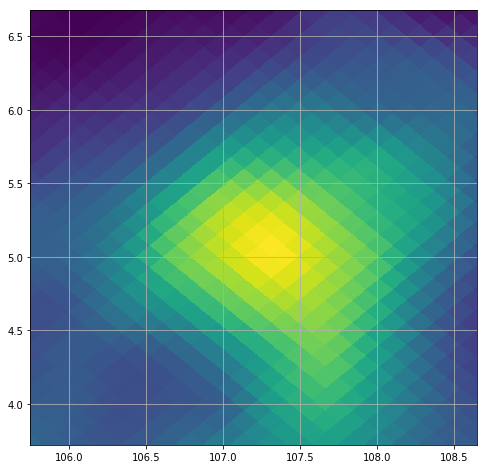

In [16]:
figsize(8, 8)
pcolormesh(X, Y, x.data)
grid()

In [78]:
z = {'lons': X, 'lats': Y, 'signal': x.data}

In [79]:
np.savez('../externaldata/haslam_gridded.npz', **z)

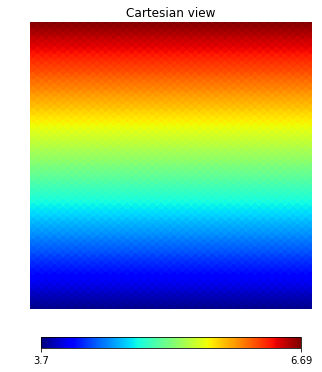

In [243]:
x = hp.cartview(hpix[1], lonra=lonra, latra=latra, return_projected_map=True, flip='geo')
fig = gcf()

In [244]:
ax = fig.axes[0]
print ax.get_xlim()
print ax.get_ylim()
img = ax.images[0]
print img.get_extent()

(105.74534025062628, 108.64824459896158)
(3.7224089900461834, 6.6793296655618217)
(105.74534025062628, 108.64824459896158, 3.7224089900461834, 6.6793296655618217)


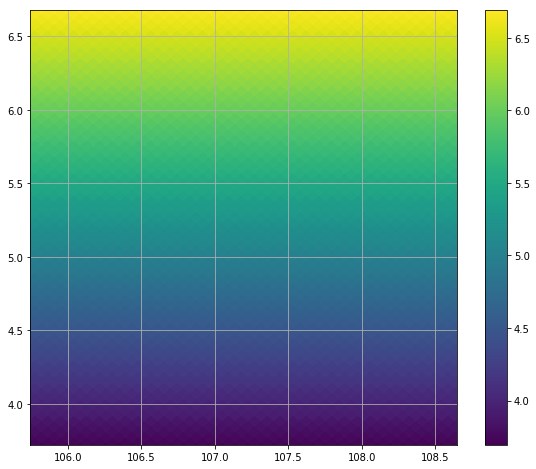

In [245]:
figsize(10, 8)
imshow(x, extent=img.get_extent(), origin='lower')
colorbar()
#clim(0, 50)
grid()

In [251]:
print x[0][0]
print x[-1][0]
print x[0][-1]
print x[-1][-1]
print ax.get_ylim()

3.73283410072
6.69225358963
3.73283410072
6.69225358963
(3.7224089900461834, 6.6793296655618217)


In [248]:
x.shape

(815, 800)

In [119]:
hp.nside2resol(nside, arcmin=True) / 60.

0.057258106863623433

In [197]:
theta, phi = hp.pix2ang(nside, np.arange(hp.nside2npix(nside)))

In [198]:
hlats = (np.pi / 2. - theta) / d2r

In [199]:
hlons = phi / d2r

In [200]:
hlons

array([  45.,  135.,  225., ...,  135.,  225.,  315.])

In [201]:
hpix[0]

array([  45.,  135.,  225., ...,  135.,  225.,  315.])

In [202]:
hlats

array([ 89.95431464,  89.95431464,  89.95431464, ..., -89.95431464,
       -89.95431464, -89.95431464])

In [203]:
hpix[1]

array([ 89.95431519,  89.95431519,  89.95431519, ..., -89.95431519,
       -89.95431519, -89.95431519])

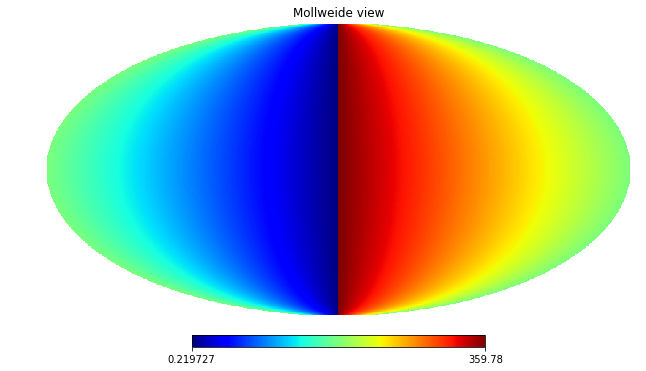

In [204]:
hp.mollview(hlons)

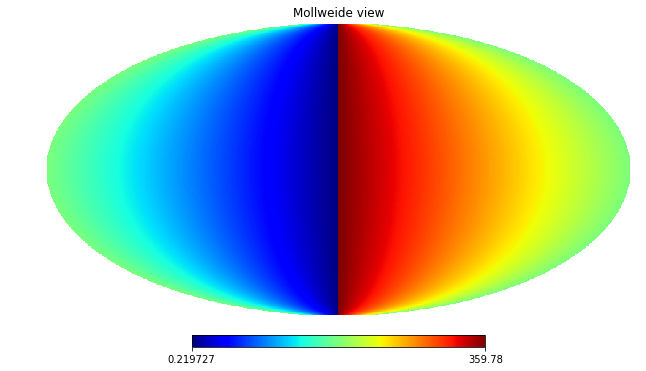

In [206]:
hp.mollview(hpix[0])

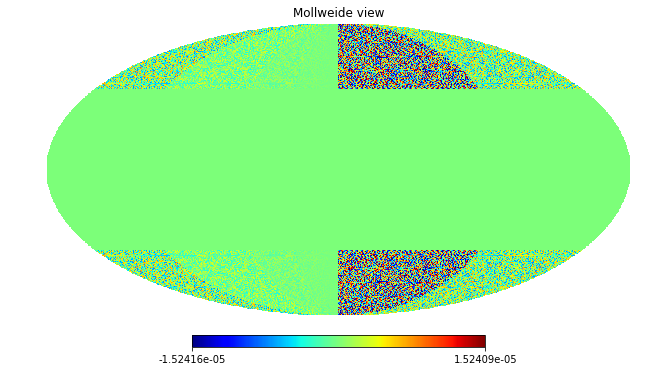

In [209]:
hp.mollview(hpix[0] - hlons)

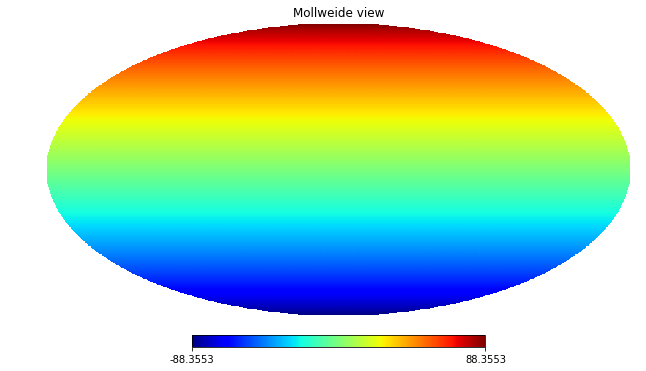

In [205]:
hp.mollview(hlats)

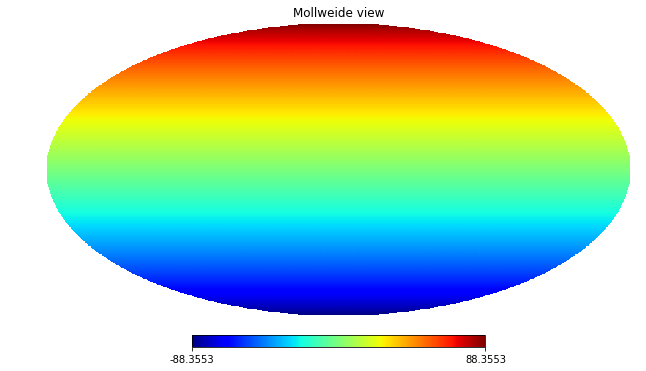

In [207]:
hp.mollview(hpix[1])

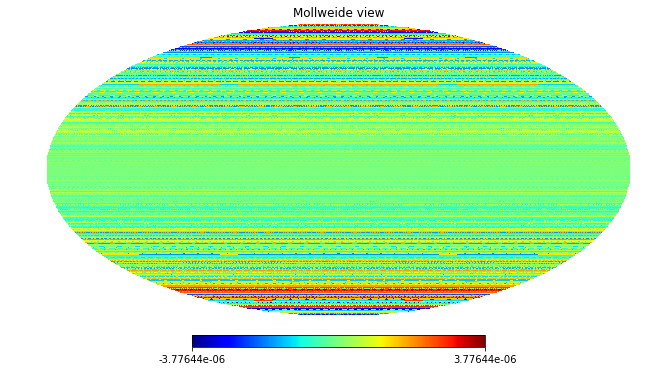

In [208]:
hp.mollview(hpix[1] - hlats)

In [108]:
z = hpix[0] * hpix[1]

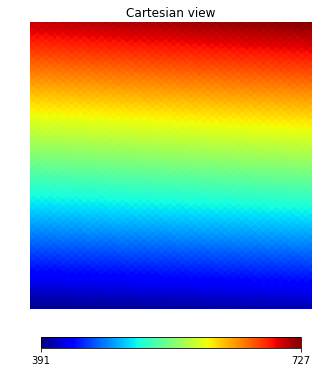

In [109]:
x = hp.cartview(z, lonra=lonra, latra=latra, return_projected_map=True, flip='geo')
fig = gcf()

In [110]:
ax = fig.axes[0]
print ax.get_xlim()
print ax.get_ylim()
img = ax.images[0]
print img.get_extent()

(105.74534025062628, 108.64824459896158)
(3.7224089900461834, 6.6793296655618217)
(105.74534025062628, 108.64824459896158, 3.7224089900461834, 6.6793296655618217)


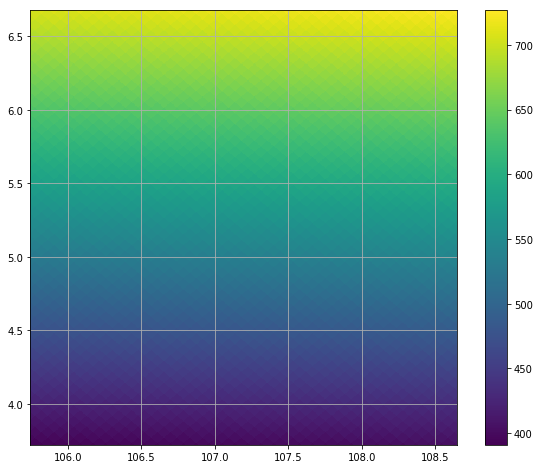

In [111]:
figsize(10, 8)
imshow(x, extent=img.get_extent(), origin='lower')
colorbar()
#clim(0, 50)
grid()

In [113]:
print x[0][0]
print x[0][-1]
print x[-1][0]
print x[-1][-1]
print ax.get_ylim()

394.845630488
405.672307519
707.588179833
726.998329405
(3.7224089900461834, 6.6793296655618217)


In [17]:
from astropy.io import fits

In [19]:
xmap = fits.open('../externaldata/CGPS-MF2_DRAO-ST-408MHz/CGPS_MF2_408_MHz_image.fits')

In [24]:
hdu = xmap[0]

In [25]:
hdu.header

SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                  -32 / number of bits per data pixel                  
NAXIS   =                    4 / number of data axes                            
NAXIS1  =                 1024 / length of data axis 1                          
NAXIS2  =                 1024 / length of data axis 2                          
NAXIS3  =                    1 / length of data axis 3                          
NAXIS4  =                    1 / length of data axis 4                          
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format defined in Astronomy and
COMMENT   Astrophysics Supplement Series v44/p363, v44/p371, v73/p359, v73/p365.
COMMENT   Contact the NASA Science Office of Standards and Technology for the   
COMMENT   FITS Definition document #100 and other FITS information.             
DATE-FTS= '2003-09-02'      

In [55]:
clon = hdu.header['CRVAL1']
mlon = hdu.header['CRPIX1']
dlon = hdu.header['CDELT1']

In [56]:
#lon x axis

In [57]:
lons = (np.arange(1024) - mlon) * dlon + clon

In [58]:
lons

array([ 111.31499969,  111.30999969,  111.30499969, ...,  106.2100003 ,
        106.20500031,  106.20000031])

In [59]:
clat = hdu.header['CRVAL2']
mlat = hdu.header['CRPIX2']
dlat = hdu.header['CDELT2']

In [99]:
lats = (np.arange(1024) - mlat) * dlat + clat

In [100]:
lats

array([ 0.43500031,  0.44000031,  0.44500031, ...,  5.5399997 ,
        5.54499969,  5.54999969])

In [63]:
lonra

[105.74534025062628, 108.64824459896158]

In [64]:
latra

[3.7224089900461834, 6.6793296655618217]

In [65]:
xmask = (lons > lonra[0]) * (lons < lonra[1])
ymask = (lats > latra[0]) * (lats < latra[1])

In [67]:
cgps = hdu.data[0][0]

In [68]:
cgps.shape

(1024, 1024)

In [76]:
hdu.header['MINCOL']

183

In [77]:
hdu.header['MINROW']

986

In [79]:
hdu.header['DATAMIN']

47.755585

In [96]:
cgps[985, 182]

47.755585

In [81]:
hdu.header['MAXCOL']

143

In [82]:
hdu.header['MAXROW']

852

In [83]:
hdu.header['DATAMAX']

1621.0293

In [97]:
cgps[851, 142]

1621.0293

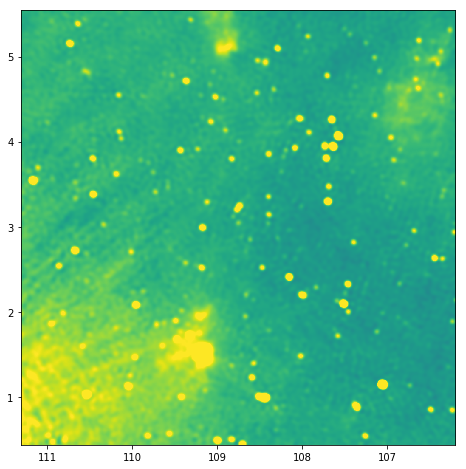

In [110]:
imshow(cgps.T, origin='lower', extent=(lons[0], lons[-1], lats[0], lats[-1]))
clim(0, 100)

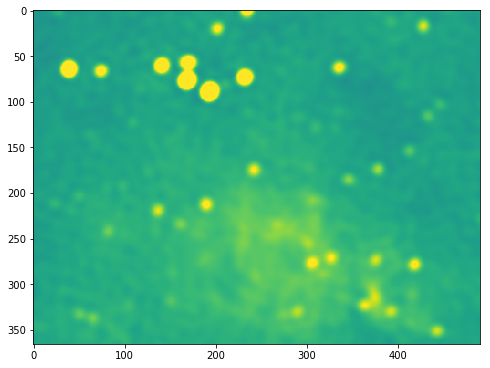

In [74]:
imshow(cgps[ymask, :][:, xmask])
clim(0, 100)

In [ ]:
x=1